In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rentsmart = pd.read_csv('rentsmart.csv')

In [4]:
rentsmart.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2023-03-21T00:00:00,Enforcement Violations,Improper storage trash: res,"314 Fuller St, 02124",Dorchester,2124,1702572000,WALLACE REALTY ENTERPRISES MASS LLC,1910.0,2005.0,Residential 4 or more family,42.279920,-71.080040
1,2023-03-21T00:00:00,Enforcement Violations,Improper storage trash: res,"11 Quint Ave, 02134",Allston,2134,2100954000,QUINT REALTY LLC MASS LLC,1930.0,2014.0,Residential 4 or more family,42.352790,-71.134260
2,2023-03-21T00:00:00,Enforcement Violations,Improper storage trash: res,"145 Warren Ave, 02116",Boston,2116,400339000,CAMPANA RICHARD A TRUSTEE,1899.0,1991.0,Residential 4 or more family,42.344300,-71.075200
3,2023-03-21T00:00:00,Enforcement Violations,Improper storage trash: res,"479 Massachusetts Ave #4, 02118",Roxbury,2118,900979000,FOUR WORCESTER SQUARE,1999.0,1999.0,Condominium Main*,42.339550,-71.080980
4,2023-03-21T00:00:00,Enforcement Violations,Improper storage trash: res,"1-3 Griggs Pl, 02134",Allston,2134,2101173000,GLENSHANE III LLC,1885.0,2017.0,Residential 2-family,42.351778,-71.135968


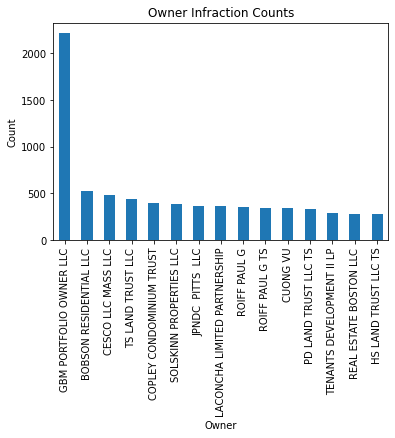

In [6]:
owner_counts = rentsmart.groupby('owner')['owner'].count()

top_owners = owner_counts.sort_values(ascending=False)[:15]

# Create a bar graph of the counts
top_owners.plot(kind='bar')

# Add labels and title
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Owner Infraction Counts')

# Show the plot
plt.show()

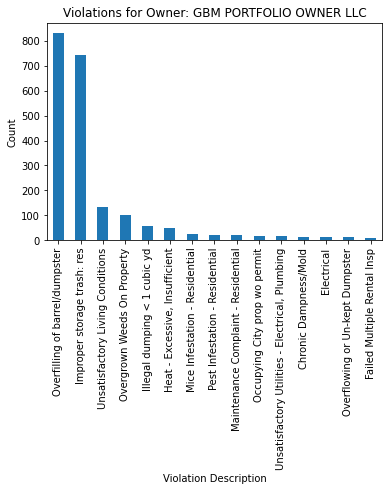

In [8]:
owner_name = 'GBM PORTFOLIO OWNER LLC'
owner_data = rentsmart[rentsmart['owner'] == owner_name]

# Group the data by violation description and count the number of occurrences
violation_counts = owner_data.groupby('description')['description'].count()

top_violations = violation_counts.sort_values(ascending=False)[:15]

# Create a bar graph of the counts
top_violations.plot(kind='bar')

# Add labels and title
plt.xlabel('Violation Description')
plt.ylabel('Count')
plt.title('Violations for Owner: ' + owner_name)

# Show the plot
plt.show()

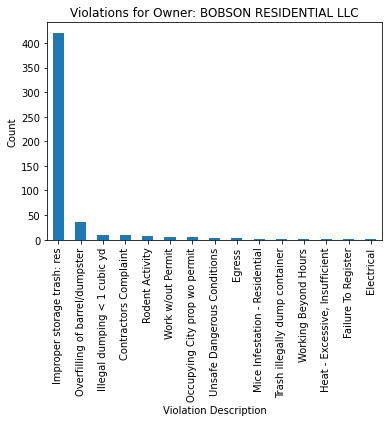

In [15]:
owner_name = 'BOBSON RESIDENTIAL LLC'
owner_data = rentsmart[rentsmart['owner'] == owner_name]

# Group the data by violation description and count the number of occurrences
violation_counts = owner_data.groupby('description')['description'].count()

top_violations = violation_counts.sort_values(ascending=False)[:15]

# Create a bar graph of the counts
top_violations.plot(kind='bar')

# Add labels and title
plt.xlabel('Violation Description')
plt.ylabel('Count')
plt.title('Violations for Owner: ' + owner_name)

# Show the plot
plt.show()

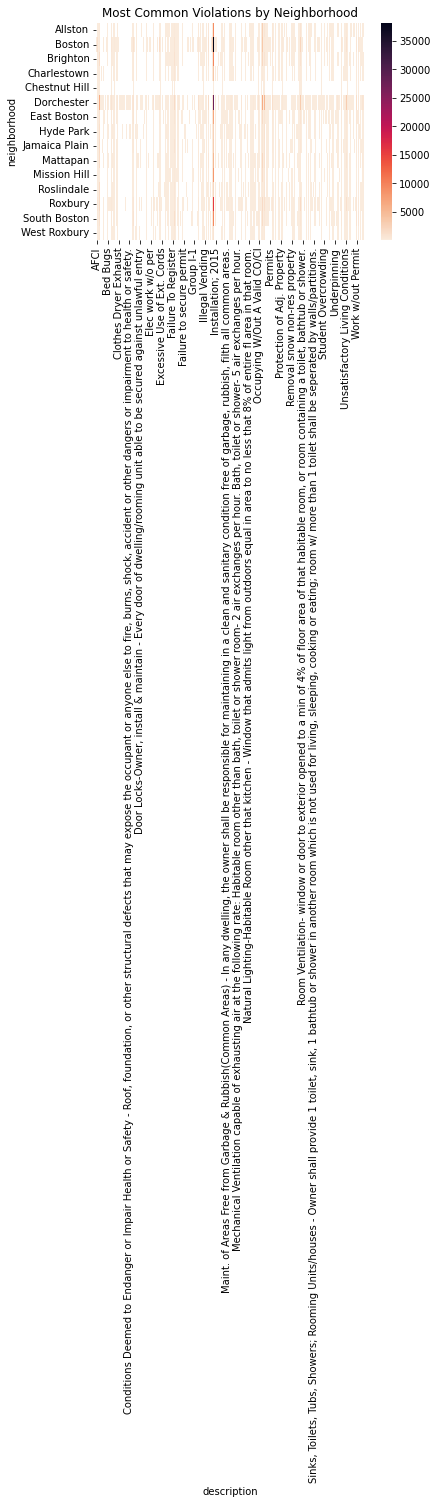

In [12]:
neighborhood_counts = rentsmart.groupby(['neighborhood', 'description']).size().reset_index(name='count')

# Pivot the data to create a matrix of counts for each neighborhood and description combination
counts_matrix = neighborhood_counts.pivot(index='neighborhood', columns='description', values='count')

# Create a heatmap of the counts matrix
sns.heatmap(counts_matrix, cmap='rocket_r')

# Set the title of the heatmap
plt.title('Most Common Violations by Neighborhood')

# Show the plot
plt.show()